# 📦 Bibliotecas Pandas e Scikit-learn

## 🔖 Objetivo Geral

Realizar uma revisão abrangente das Bibliotecas Pandas e Scikit-learn

Nesta aula, vamos revisar o processo de:

1. Carregar e explorar um dataset usando o **Pandas**
2. Identificar e tratar valores ausentes
3. Detectar e lidar com **outliers**
4. Trabalhar com variáveis **categóricas**
5. Preparar os dados para uso em algoritmos de **machine learning** com o **Scikit-learn**

# 1. Carregar e explorar um dataset usando o Pandas

### 🐍 Código

...

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

### 🔖 Explicações

**Carga das Bibliotecas**

- **pandas** 
    - O Pandas é uma biblioteca essencial para **manipulação e análise** de dados em Python. Ele permite trabalhar com estruturas de dados como o DataFrame , que é semelhante a uma tabela do Excel ou um banco de dados relacional.
    
- **numpy**
    - O NumPy é uma biblioteca fundamental para **computação científica** em Python. Ela fornece suporte para **arrays multidimensionais** e **funções matemáticas** avançadas.

- **StandardScaler**
    -  **Padronizar** (ou normalizar) as variáveis numéricas, ou seja, transformar os valores para que tenham **média zero e desvio padrão igual a 1** .
    - Muitos algoritmos de machine learning (como KNN, Regressão Logística e SVM) funcionam melhor quando os dados estão na mesma escala.

### 🐍 Código

In [4]:
df = pd.read_csv('dataset/dataset_sudeste_realista_outliers-20250618_112119.csv')
print(df.head(10))

   id  idade     renda          cidade categoria  nota feedback
0   1   65.0  18557.03  Belo Horizonte         A   6.4      Bom
1   2   21.0  10111.54  Belo Horizonte         A   6.3      Bom
2   3   18.0  24588.69         Vitória         B   6.1      Bom
3   4   31.0  45412.01  Belo Horizonte         A   5.5      Bom
4   5   33.0  37340.94       São Paulo         A   7.2      Bom
5   6   29.0  19550.52       São Paulo         B   6.3      Bom
6   7   24.0  31021.45         Vitória         B   7.8      Bom
7   8   40.0   2203.13         Vitória         A   8.5      NaN
8   9   40.0  34743.23         Vitória         A   6.9      Bom
9  10   31.0  26474.40             NaN         B   9.7      Bom


### 🔖 Explicações

- Estamos lendo o arquivo CSV e armazenando seus dados em um DataFrame chamado `df`.
- O método `.head()` mostra as primeiras linhas do dataset.

### 🐍 Código

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   idade      995 non-null    float64
 2   renda      992 non-null    float64
 3   cidade     984 non-null    object 
 4   categoria  994 non-null    object 
 5   nota       992 non-null    float64
 6   feedback   966 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB
None


### 🔖 Explicações

Isso mostrará:

- Quantidade de linhas e colunas
- Tipo de cada coluna
- Número de valores não nulos

### 🐍 Código

In [6]:
print(df.describe())

                id       idade         renda        nota
count  1000.000000  995.000000    992.000000  992.000000
mean    500.500000   47.945729  24215.989728    7.369153
std     288.819436   19.523372  13136.001391    1.518017
min       1.000000    8.000000    613.070000    0.200000
25%     250.750000   31.000000  12860.012500    6.100000
50%     500.500000   48.000000  24138.835000    7.300000
75%     750.250000   64.000000  35346.562500    8.600000
max    1000.000000  107.000000  84221.190000   10.000000


### 🔖 Explicações

- Isso ajuda a entender melhor a distribuição dos dados numéricos, como média, desvio padrão, valores mínimos e máximos.

# 2. Identificar e tratar valores ausentes

### 🐍 Código

In [8]:
print(df.isnull().sum())

id            0
idade         5
renda         8
cidade       16
categoria     6
nota          8
feedback     34
dtype: int64


### 🔖 Explicações

O método `.isnull()` retorna True onde há valores ausentes. Usando `.sum()`, contamos quantos valores faltantes existem por coluna.

### 🐍 Código

In [9]:
imputer_media = SimpleImputer(strategy='mean')
df[['idade', 'nota']] = imputer_media.fit_transform(df[['idade', 'nota']])

### 🔖 Explicações

- Vamos preencher os valores ausentes nas colunas **numéricas**: `idade` e `nota`.
- Usaremos a **média** para preencher esses campos

### 🐍 Código

In [10]:
imputer_mediana = SimpleImputer(strategy='median')
df[['renda']] = imputer_mediana.fit_transform(df[['renda']])

### 🔖 Explicações

- Para a coluna renda, poderíamos usar a mediana se houver muitos outliers

# 3. Detectar e lidar com outliers

### 🐍 Código - Gerando e analisando o gráfico Boxplot

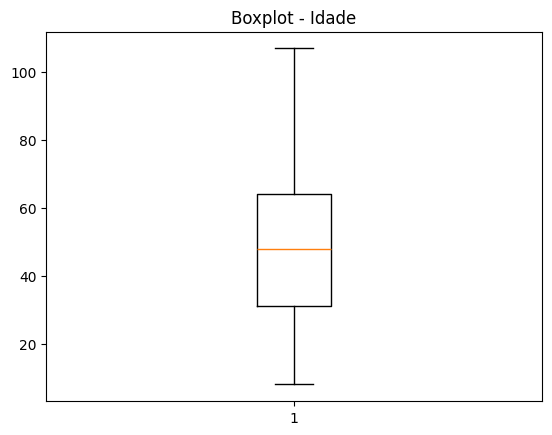

In [12]:
# carga da biblioteca
import matplotlib.pyplot as plt

# Geração do Gráfico
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

### 🔖 Explicações

Este código é usado para criar e exibir um gráfico de caixa (`boxplot`) da coluna **idade** de um DataFrame chamado df.

- A biblioteca **Matplotlib** , mais especificamente o módulo `pyplot`,  é usado para criar gráficos em 2D no Python. Usamos este módulo para visualizar dados graficamente, como histogramas, gráficos de linhas, dispersão e boxplots .

- **Boxplot** é um tipo de gráfico que mostra a distribuição dos dados com base nos quartis . Ele ajuda a identificar:
    - A mediana (valor central)
    - Os quartis (25%, 50%, 75%)
    - Valores extremos (outliers )
    - A caixa representa os valores entre o 1º quartil (**Q1**) e o 3º quartil (**Q3**).
    - A linha dentro da caixa é a **mediana** .
    - As "extremidades" das linhas ("**bigodes**") indicam os valores **mínimos** e **máximos** que não são outliers .
    - Pontos fora dessas extremidades são considerados outliers .
      
- Matplotlib constrói o gráfico em memória primeiro, e plt.show() é o comando que realmente mostra o gráfico.

### 🐍 Código - Tratando os Outliers

In [13]:
Q1 = df['idade'].quantile(0.25)
Q3 = df['idade'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['idade'] >= limite_inferior) & (df['idade'] <= limite_superior)]

### 🔖 Explicações

Acima, calculamos os quartis e removemos registros fora do intervalo considerado normal.

### 🐍 Código - Reverificando com boxplot

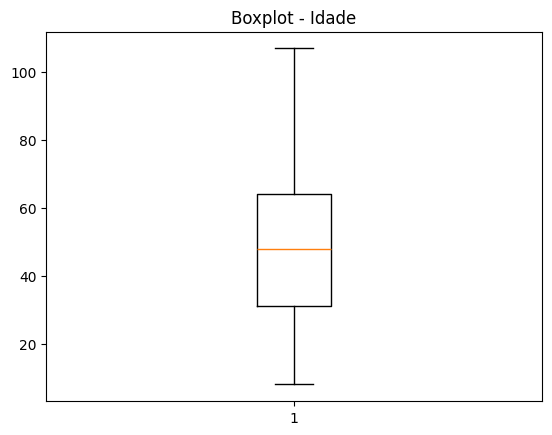

In [14]:
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

### 🔖 Explicações

...

# 4. Trabalhar com variáveis categóricas

As variáveis categóricas precisam ser convertidas em números para os algoritmos de ML entenderem.

### 🐍 Código

In [17]:
# Realiza a códificação das coluas
encoder = OneHotEncoder(sparse_output=False, drop='first')  
categorias_codificadas = encoder.fit_transform(df[['cidade', 'categoria', 'feedback']])

# Converter os resultados do encoding para um DataFrame
df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade', 'categoria', 'feedback']))

# Resetar o índice do df original e concatenar com as novas colunas
df_final = pd.concat([df.reset_index(drop=True), df_categorias], axis=1)

# Remover as colunas categóricas originais (sem usar inplace)
df_final = df_final.drop(['cidade', 'categoria', 'feedback'], axis=1)

### 🔖 Explicações

O `OneHotEncoding` cria uma nova coluna binária para cada categoria. Por exemplo, "São Paulo", "Rio de Janeiro" viram novas colunas com 0 ou 1.

O primeiro comando cria uma instância do **OneHotEncoder**, que será usada para transformar variáveis categóricas em colunas binárias (0 ou 1).

- **sparse_output=False**: retorna um **array NumPy** normal (não esparsa), mais fácil de trabalhar.

- **drop='first'**: remove a primeira categoria de cada variável para evitar multicolinearidade (muito útil em modelos como Regressão Linear).

O `fit_transform` ajusta o encoder às colunas categóricas (fit) e depois aplica a transformação (transform), gerando um array com as categorias convertidas em números. Ao final temos um array NumPy chamado **categorias_codificadas** com as novas colunas criadas pelo One-Hot Encoding.

O comando `pd.DataFrame` converte o array **categorias_codificadas** em um novo DataFrame chamado **df_categorias**.

Já o método `get_feature_names_out()` gera nomes descritivos para as novas colunas, como: **cidade_Sao Paulo**, **categoria_B**, **feedback_Ruim**.

O `pd.concat(..)` concatenando o novo DataFrame com o original

- **reset_index(drop=True)** : Reinicia os índices do DataFrame original (df) para garantir que ele combine corretamente com o novo (df_categorias).

- **pd.concat(..., axis=1)** : Une os dois DataFrames lado a lado (colunas do original + colunas codificadas).

Finalmente `df_final.drop(...)`, remove as colunas categóricas originais (`cidade`, `categoria`, `feedback`) do DataFrame final.

### 🐍 Código

In [18]:
print(df_final.head())

   id  idade     renda  nota  cidade_Rio de Janeiro  cidade_São Paulo  \
0   1   65.0  18557.03   6.4                    0.0               0.0   
1   2   21.0  10111.54   6.3                    0.0               0.0   
2   3   18.0  24588.69   6.1                    0.0               0.0   
3   4   31.0  45412.01   5.5                    0.0               0.0   
4   5   33.0  37340.94   7.2                    0.0               1.0   

   cidade_Vitória  cidade_nan  categoria_B  categoria_nan  feedback_nan  
0             0.0         0.0          0.0            0.0           0.0  
1             0.0         0.0          0.0            0.0           0.0  
2             1.0         0.0          1.0            0.0           0.0  
3             0.0         0.0          0.0            0.0           0.0  
4             0.0         0.0          0.0            0.0           0.0  


### 🔖 Explicações

...

# 5. Preparar os dados para uso em algoritmos de machine learning com o Scikit-learn
- Alguns algoritmos de ML funcionam melhor com dados padronizados (média zero e desvio padrão 1).

### 🐍 Código

In [19]:
scaler = StandardScaler()
df_final[['idade', 'renda', 'nota']] = scaler.fit_transform(df_final[['idade', 'renda', 'nota']])

### 🔖 Explicações

Este código é usado para **padronizar (normalizar)** as colunas numéricas de um DataFrame (`df_final`) usando a técnica de **StandardScaler**, que faz parte da biblioteca **Scikit-learn**.

Cria-se  uma instância do objeto `StandardScaler`, chamado aqui de `scaler`. A padronização ajusta os dados para que tenham escala semelhante, o que pode melhorar o desempenho dos modelos Machine Learning.

O método `.fit_transform()` realiza duas etapas em uma só:
  1. **`.fit()`**: calcula a média e o desvio padrão das colunas `'idade'`, `'renda'` e `'nota'`.
  2. **`.transform()`**: aplica a padronização nos dados com base nos valores calculados.

Assim, todos os valores são reescalados para terem média zero e desvio padrão 1.

Finalmente substitui-se as colunas originais (`'idade'`, `'renda'`, `'nota'`) no DataFrame `df_final` pelos novos valores padronizados. Ou seja, após essa linha:

- As colunas continuam existindo com os mesmos nomes.
- Mas agora contêm **valores padronizados** em vez dos originais.

### 🐍 Código

In [30]:
print(df[['idade', 'renda', 'nota']].head(10))

   idade     renda  nota
0   65.0  18557.03   6.4
1   21.0  10111.54   6.3
2   18.0  24588.69   6.1
3   31.0  45412.01   5.5
4   33.0  37340.94   7.2
5   29.0  19550.52   6.3
6   24.0  31021.45   7.8
7   40.0   2203.13   8.5
8   40.0  34743.23   6.9
9   31.0  26474.40   9.7


### 🔖 Explicações

...

### 🐍 Código

In [29]:
print(df_final[['idade', 'renda', 'nota']].head(10))

      idade     renda      nota
0  0.876163 -0.432702 -0.641326
1 -1.384337 -1.078542 -0.707500
2 -1.538462  0.028548 -0.839848
3 -0.870587  1.620940 -1.236891
4 -0.767837  1.003733 -0.111935
5 -0.973337 -0.356729 -0.707500
6 -1.230212  0.520471  0.285108
7 -0.408212 -1.683310  0.748325
8 -0.408212  0.805082 -0.310457
9 -0.870587  0.172751  1.542412


### 🔖 Explicações

...

### 🐍 Código

In [26]:
df_final[['idade', 'renda', 'nota']].describe()

,idade,renda,nota
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,9.237056e-17,-1.243450e-16,-9.769963e-18
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.052213e+00,-1.804905e+00,-4.744106e+00
25%,-8.705871e-01,-8.667407e-01,-8.398478e-01
50%,2.788192e-03,-5.852941e-03,-4.576137e-02
75%,8.247885e-01,8.473194e-01,8.144990e-01
max,3.033914e+00,4.588738e+00,1.740933e+00


### 🔖 Explicações

...